In [1]:
#importing libraries
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
import hvplot.pandas
import scipy.stats as stats
import random

In [2]:
#importing data from previous chunk of code
# reduced_r_public_gdf = pd.read_csv("output_data/reduced_r_public_gdf.csv")
# reduced_q_public_gdf = pd.read_csv("output_data/reduced_r_public_gdf.csv")
# reduced_k_public_gdf = pd.read_csv("output_data/reduced_r_public_gdf.csv")
# reduced_x_public_gdf = pd.read_csv("output_data/reduced_r_public_gdf.csv")
# reduced_m_public_gdf = pd.read_csv("output_data/reduced_r_public_gdf.csv")

r_crimes_gdf = pd.read_csv("output_data/r_crimes_gdf.csv")
q_crimes_gdf = pd.read_csv("output_data/q_crimes_gdf.csv")
k_crimes_gdf = pd.read_csv("output_data/k_crimes_gdf.csv")
x_crimes_gdf = pd.read_csv("output_data/x_crimes_gdf.csv")
m_crimes_gdf = pd.read_csv("output_data/m_crimes_gdf.csv")

**Finding the Control Data**

- what i want to do is grab a random series of coordinates within staten island and see the number of crimes occured in the same radius
- then compare them to library/park data to see if there is a significant difference

In [ ]:
# Coordinates for the polygon of staten island
# Coordinates determined by HeadWall photonics (http://apps.headwallphotonics.com)

staten_island_poly = Polygon([
    (40.5004753162685, -74.24873416273303),
    (40.54484131402899, -74.24221103040881),
    (40.554754403637595, -74.20753543226428),
    (40.6379143073708, -74.19174258558459),
    (40.64130107521177, -74.07844607679553),
    (40.60195187161857, -74.05784671156115),
    (40.5411887532192, -74.1261679395885)
])
staten_island_poly

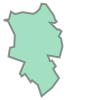

In [80]:
# Coordinates for the polygon of Queens
# Coordinates determined by HeadWall photonics (http://apps.headwallphotonics.com)
queens_annex_poly = Polygon([
(40.544722434447046, -73.93797369602206),
(40.555385486761516, -73.90892000797274),
(40.56430266845497, -73.87422295215609),
(40.575826406702106, -73.83815260532381),
(40.58804885372343, -73.7889287054825),
(40.594533991890565, -73.7371298849869),
(40.61069521681332, -73.74365301731112),
(40.613431811532955, -73.76854391696932),
(40.60614795792396, -73.78278036894753),
(40.59782058407185, -73.80319663049605),
(40.584291633723474, -73.83029624343683),
(40.58121867054795, -73.85256645320513),
(40.57262741027578, -73.8694636565261),
(40.567027360883614, -73.8789422264483),
(40.56768636153804, -73.89254066941739),
(40.5643238418201, -73.91088555213356),
(40.5557723879539, -73.93727563494873)

])
queens_poly = Polygon([
(40.65034357145685, -73.82444294504265),
(40.646436276566554, -73.8491621833239),
(40.69161667259464, -73.86512669138054),
(40.67801369382192, -73.89731319955925),
(40.683220903619834, -73.9052096228991),
(40.692983325573486, -73.89851482919792),
(40.708990601507054, -73.9216891150866),
(40.71284805224667, -73.91665389230275),
(40.72870471211942, -73.92895333667934),
(40.739615309797415, -73.96116550078247),
(40.769882760654, -73.93627460112427),
(40.788700149775686, -73.91001041045044),
(40.77752188089111, -73.89284427275513),
(40.77258204651135, -73.88391788115356),
(40.779861674239875, -73.87636478056763),
(40.76920194820335, -73.86022861113403),
(40.76317126236197, -73.86134294326233),
(40.75714002927082, -73.84597778320312),
(40.790339654182766, -73.85172990615295),
(40.79857705399254, -73.82040317168091),
(40.79438604712569, -73.79748637785767),
(40.788375226649194, -73.79242236723755),
(40.79584805631508, -73.77783115019653),
(40.788050301932834, -73.77199466338013),
(40.783436199383075, -73.77276713957642),
(40.763806435034766, -73.75388438811157),
(40.777261898765104, -73.75474269499634),
(40.782461347967335, -73.75100906004761),
(40.777222312480966, -73.74372204116173),
(40.77410244574748, -73.73350818923302),
(40.7520036188566, -73.70152473449707),
(40.73930688199643, -73.70016912880567),
(40.73454276165232, -73.71391972428614),
(40.72549366362228, -73.72354160405762),
(40.71592289198027, -73.72870028802832),
(40.686755018399005, -73.72391145479783),
(40.66509279923652, -73.72922658200358),
(40.65295818817826, -73.72226135596561),
(40.64752931634277, -73.74387774919037),
(40.63276215230612, -73.74625512792501),
(40.64517152217268, -73.7499799171326),
(40.66399382571134, -73.78901518890714),
(40.66230886467904, -73.82108048343278),

])
list = [queens_poly, queens_annex_poly]
queens_poly = MultiPolygon(list)

In [ ]:
queens_poly

In [ ]:
#brooklyn polygon

brooklyn_poly = Polygon([
(40.64127636633028, -74.03672772193043),
(40.665206807122736, -74.00273876929373),
(40.680797672117805, -74.01544171118826),
(40.70471393521108, -73.97527294898123),
(40.7390277153181, -73.95982342505545),
(40.735186589776674, -73.94724922919363),
(40.6803339046364, -73.89347630286306),
(40.69867873585417, -73.86008816504568),
(40.66247233400528, -73.84275036597342),
(40.64733304413664, -73.83691387915701),
(40.648358717407405, -73.86214810156912),
(40.62958477279449, -73.88738232398123),
(40.58263496256981, -73.93373089575856),
(40.57249781744687, -73.97286968970388),
(40.57644203395298, -74.01132183814138),
(40.58023934501919, -73.98883419776053),
(40.592900923152676, -73.99999218726248),
(40.605706721531234, -74.02780133032888),
(40.621148619215376, -74.04119091773123)
])


In [ ]:
#bronx polygon

bronx_poly = Polygon([
(40.91513058178467, -73.91080710258225),
(40.88204341007443, -73.79356238212327),
(40.86911004099939, -73.80326625829538),
(40.866041005635, -73.79975220844207),
(40.879800224550394, -73.7901391713327),
(40.87872564414774, -73.7849893300241),
(40.857533615809935, -73.78962418720184),
(40.83737380280887, -73.78258607074676),
(40.84604230007938, -73.79134080097137),
(40.85548869693003, -73.79288575336395),
(40.84857852720188, -73.79863140111765),
(40.8611871348291, -73.80477079953083),
(40.86160613917069, -73.81482876762452),
(40.83584540657383, -73.81573787862449),
(40.813192836740406, -73.80222743396038),
(40.80519634635972, -73.83470298928839),
(40.804794797576385, -73.8522755599053),
(40.81283869275497, -73.87019145327612),
(40.80139286186507, -73.87231449996725),
(40.80592901156586, -73.89864180080876),
(40.79539168596511, -73.91535606454093),
(40.808102661910745, -73.9302451632943),
(40.835595376944696, -73.93187089498073),
(40.872423309741876, -73.90877738838587),
(40.87950439499268, -73.92283341571746)
])


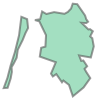

In [82]:
#manhattan polygon
manhattan_poly = Polygon([
    (40.70112077942011, -74.01424996444936),
    (40.70658644332001, -73.9998304087853),
    (40.7110106998642, -73.97614113876577),
    (40.7281844393501, -73.9727079112267),
    (40.73937100705069, -73.97579781601186),
    (40.77629933343638, -73.94283883163686),
    (40.7820187880502, -73.94386879989858),
    (40.799434093408316, -73.92944924423452),
    (40.83499869130992, -73.93549954885219),
    (40.8721019057399, -73.91065080561826),
    (40.87431158693697, -73.92697195081404),
    (40.754526709299185, -74.00696615247419),
    (40.72010588058742, -74.01290697851486),
    (40.71850336599253, -74.01553406878129),
    (40.7090937935794, -74.01747451353991),
])

In [83]:
# Defining the randomization generator
#code adjusted from online source published by Ayush Sethi

def polygon_random_points (poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
            random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
            if (random_point.within(poly)):
                points.append(random_point)
    return points

In [84]:
# Choose the number of points desired. This method uses 100 points. 
r_points = polygon_random_points(staten_island_poly, 100)
q_points = polygon_random_points(queens_poly, 100)
k_points = polygon_random_points(brooklyn_poly, 100)
x_points = polygon_random_points(bronx_poly, 100)
m_points = polygon_random_points(manhattan_poly, 100)


40.6994433786315 , -73.83439723463347
40.71109160929334 , -73.77409497031448
40.75150591849411 , -73.84920198908927
40.66367913872517 , -73.75773964097537
40.55800424556298 , -73.93013153901327
40.733996429753134 , -73.75079070441596
40.69221182247245 , -73.80551724630644
40.71157903036344 , -73.88162809074001
40.791154939374465 , -73.77931256482023
40.76539713574506 , -73.78789015518696
40.71365213513429 , -73.81836043877531
40.78184707901002 , -73.84716858485511
40.78889288284171 , -73.80575314790785
40.76135675076474 , -73.91527689528077
40.69986453523447 , -73.89687800282756
40.77543089508546 , -73.90163763904746
40.76927699128512 , -73.93208973613535
40.71058900793272 , -73.7674213504469
40.58309296140122 , -73.83181542912556
40.68299953681745 , -73.7646193588927
40.676440577292155 , -73.77474337025521
40.759101482717234 , -73.765340023985
40.7627158571347 , -73.93226896456066
40.750194960481835 , -73.79325457758098
40.684636853525035 , -73.81278972128253
40.66689896193205 , -73.8

In [85]:
def random_gdf(points):
    random_gdf = gpd.GeoDataFrame(points,
                                geometry= points,
                                crs= "EPSG:4326")
    #this step is for mapping later
    random_gdf['Latitude'] = random_gdf['geometry'].x
    random_gdf['Longitude'] = random_gdf['geometry'].y

    #converting to meters
    random_gdf = random_gdf.to_crs(3857)
    return random_gdf

,0,geometry,Latitude,Longitude
0,POINT (40.6994433786315 -73.83439723463347),POINT (4530641.312 -12448999.256),40.699443,-73.834397
1,POINT (40.71109160929334 -73.77409497031448),POINT (4531937.988 -12424932.045),40.711092,-73.774095
2,POINT (40.75150591849411 -73.84920198908927),POINT (4536436.888 -12454921.334),40.751506,-73.849202
3,POINT (40.66367913872517 -73.75773964097537),POINT (4526660.056 -12418419.481),40.663679,-73.757740
4,POINT (40.55800424556298 -73.93013153901327),POINT (4514896.380 -12487387.810),40.558004,-73.930132


In [ ]:
r_random_gdf = random_gdf(r_points)
q_random_gdf = random_gdf(q_points)
k_random_gdf = random_gdf(k_points)
x_random_gdf = random_gdf(x_points)
m_random_gdf = random_gdf(m_points)

In [87]:
#repeating method to get number of crimes within a mile radius of each random point
#create empty list to hold the number of crimes commited within a 1 mile radius of each location
crimes_per_location = []

#NOTE: radius is in meters
def crimesper (crimes_gdf, public_gdf, radius):
    radius = radius
    for offense in crimes_gdf["Offense"]:
        crimes_per_location = []
        crimes_gdf_each = crimes_gdf[crimes_gdf["Offense"] == offense]

        for i in range(len(public_gdf)):

            # Calculate the distances between all pairs of points
            distances = gpd.GeoSeries(crimes_gdf_each.geometry).distance(public_gdf.geometry.iloc[i])

            # Filter the pairs where the distance is within the radius
            within_radius = distances <= radius

            # Count the number of points within the radius for each point in gdf2
            count_within_radius = within_radius.sum()
            
            crimes_per_location.append(count_within_radius)
        public_gdf[offense] = crimes_per_location

    #creating a column for the sum amount of offenses
    public_gdf["Total Crimes"] = public_gdf[['ROBBERY', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE']].sum(axis=1)

In [89]:
q_random_gdf.head(15)

,0,geometry,Latitude,Longitude,RAPE,ROBBERY,MURDER & NON-NEGL. MANSLAUGHTER,Total Crimes
0,POINT (40.6994433786315 -73.83439723463347),POINT (4530641.312 -12448999.256),40.699443,-73.834397,15,25,0,40
1,POINT (40.71109160929334 -73.77409497031448),POINT (4531937.988 -12424932.045),40.711092,-73.774095,0,23,0,23
2,POINT (40.75150591849411 -73.84920198908927),POINT (4536436.888 -12454921.334),40.751506,-73.849202,0,24,0,24
3,POINT (40.66367913872517 -73.75773964097537),POINT (4526660.056 -12418419.481),40.663679,-73.757740,0,12,0,12
4,POINT (40.55800424556298 -73.93013153901327),POINT (4514896.380 -12487387.810),40.558004,-73.930132,0,0,0,0
...,...,...,...,...,...,...,...,...
95,POINT (40.68784464082619 -73.77286034442601),POINT (4529350.147 -12424440.203),40.687845,-73.772860,20,10,0,30
96,POINT (40.72441124652256 -73.86484386479266),POINT (4533420.723 -12461184.014),40.724411,-73.864844,0,19,0,19
97,POINT (40.7619627226302 -73.8168364973484),POINT (4537600.934 -12441981.592),40.761963,-73.816836,0,26,0,26
98,POINT (40.56149368290521 -73.91250346992528),POINT (4515284.823 -12480302.426),40.561494,-73.912503,0,0,0,0


In [88]:
crimesper(r_crimes_gdf, r_random_gdf, 1609)

,ROBBERY,MURDER & NON-NEGL. MANSLAUGHTER,RAPE,Total Crimes
count,100.000000,100.00000,100.000000,100.000000
mean,20.430000,0.26000,2.280000,22.970000
std,26.310598,0.61332,7.211215,28.918015
min,0.000000,0.00000,0.000000,0.000000
25%,4.000000,0.00000,0.000000,4.000000
50%,11.000000,0.00000,0.000000,11.500000
75%,25.250000,0.00000,0.000000,27.000000
max,144.000000,3.00000,32.000000,146.000000


In [ ]:
crimesper(q_crimes_gdf, q_random_gdf, 1609)

In [ ]:
crimesper(k_crimes_gdf, k_random_gdf, 1609)

In [ ]:
crimesper(x_crimes_gdf, x_random_gdf, 1609)

In [ ]:
crimesper(m_crimes_gdf, m_random_gdf, 1609)

In [ ]:
path = "C:/Users/54qb3/Documents/Project-1/output_data/"
pd.DataFrame(r_random_gdf).to_csv(f"{path}r_random_gdf.csv")
pd.DataFrame(q_random_gdf).to_csv(f"{path}q_random_gdf.csv")
pd.DataFrame(k_random_gdf).to_csv(f"{path}k_random_gdf.csv")
pd.DataFrame(x_random_gdf).to_csv(f"{path}x_random_gdf.csv")
pd.DataFrame(m_random_gdf).to_csv(f"{path}m_random_gdf.csv")

**Is There A Signficant Difference in the Amount of Crime Commited by a Public Institution vs Not?**
- Null Hypothesis: there is no difference between the rate of crime by a public institution vs not near a public institution
- Alternate Hypothesis: if within a 1 mile radius of a public institution, then there is a lower rate of crime

- What am I comparing?
    - the true mean of crime committed within a mile of a public library and park respectively
    - the true mean of crime committed within a mile radius anywhere in Staten Island


In [92]:
#Significance Tests
    #this won't be the same in the other boroughs because their sample sizes will be above 30, but because the sample size in staten island is <30 we will be using a t-test
def ttests(df, df2):
    for crime in df.columns:
        try:
            print(f"{crime}: {stats.ttest_ind(df[crime], df2[crime], equal_var=False)}")
        except:
            print("NA")

#dividing public areas into libraries and other. not doing malls bc there is only one data point for that
libraries = q_public_gdf[q_public_gdf["Public Area"] == "PUBLIC LIBRARIES"]
parks = q_public_gdf[q_public_gdf["Public Area"] == "Parks and Other Outdoor Areas"]



In [93]:
# no significance found for any crime, unable to reject null hypo

ttests(q_public_gdf, q_random_gdf)

NA
NA
NA
NA
Latitude: TtestResult(statistic=0.14848264634941116, pvalue=0.882128430165396, df=179.63294849616395)
Longitude: TtestResult(statistic=-0.36063672489037724, pvalue=0.7188152020273124, df=171.35860723356856)
NA
RAPE: TtestResult(statistic=-0.44963801452376423, pvalue=0.6535107861423664, df=180.55510650363578)
ROBBERY: TtestResult(statistic=2.5394042505707617, pvalue=0.01224536851991074, df=134.11321533845546)
MURDER & NON-NEGL. MANSLAUGHTER: TtestResult(statistic=1.5473941973814518, pvalue=0.12409075737480432, df=136.07866391931285)
Total Crimes: TtestResult(statistic=2.31697606259729, pvalue=0.02198899401969106, df=136.89672332060064)


In [94]:
# p-value = .001 for murder & non negl homocide, able to reject null hypo
# no significance found for any other crime, unable to reject null hypo

print(ttests(libraries, q_random_gdf))

NA
NA
NA
NA
Latitude: TtestResult(statistic=0.37884623859556577, pvalue=0.7076171207929977, df=28.425529721454698)
Longitude: TtestResult(statistic=0.3994600936261739, pvalue=0.692944295557121, df=25.0159297301123)
NA
RAPE: TtestResult(statistic=-0.07427182284739635, pvalue=0.9413353359804475, df=27.316006362236166)
ROBBERY: TtestResult(statistic=1.653166394709332, pvalue=0.11375162677503445, df=20.205079947052788)
MURDER & NON-NEGL. MANSLAUGHTER: TtestResult(statistic=0.7983469239008014, pvalue=0.4332760516326396, df=21.81201760912752)
Total Crimes: TtestResult(statistic=1.545281243307252, pvalue=0.13770515302409686, df=20.327525706952933)
None


In [95]:
# no significance found for any crime, unable to reject null hypo

print(ttests(parks, q_random_gdf))

NA
NA
NA
NA
Latitude: TtestResult(statistic=0.04932299587592418, pvalue=0.9608116801263041, df=65.63557518739952)
Longitude: TtestResult(statistic=-0.4882122952525006, pvalue=0.6272402538099168, df=57.997594393510084)
NA
RAPE: TtestResult(statistic=-0.3003787745000457, pvalue=0.7648389704413361, df=65.54181734065713)
ROBBERY: TtestResult(statistic=2.079748003501791, pvalue=0.04350209887837142, df=43.305335758228736)
MURDER & NON-NEGL. MANSLAUGHTER: TtestResult(statistic=0.3821025583704071, pvalue=0.703990169791441, df=50.45028724876843)
Total Crimes: TtestResult(statistic=1.9395509378502132, pvalue=0.058808231261839254, df=44.370018469903115)
None
